In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy
import API_TensorFlow

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [10]:
equation=transp_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
Sim_DS_1=load_model('Modelos treinados/ebdmyfkw/sparkling-sweep-30',equation=equation,WENO_method=WENO_Z)
Sim_DS_2=load_model('Modelos treinados/ebdmyfkw/chocolate-sweep-22',equation=equation,WENO_method=WENO_Z)
Sim_DS_3=load_model('Modelos treinados/ebdmyfkw/atomic-sweep-24',equation=equation,WENO_method=WENO_Z)
Sim_Z_MS=simulation(API_Numpy,equation,WENO_Z,mapping=pre_mapping,map_function=Hong_mapping)
Sim_ZM_MS=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=Hong_mapping)
Sim_ZM_BI=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=BI_mapping)
Δx=0.01
CFL=0.5

In [3]:
x_dense, fx_dense = create_f_points(f_test_1,Δx/100)
x, fx = create_f_points(f_test_1,Δx)

In [11]:
Z_y=Sim_Z.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
net_y=Sim_DS_1.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
net2_y=Sim_DS_2.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)
net3_y=Sim_DS_3.Sim(fx,0.1,Δx,0.5,FronteiraPeriodica)

In [6]:
ref_y=Sim_Z.Sim(fx_dense,0.1,Δx/100,0.5,FronteiraPeriodica)

In [12]:
print(np.sum(np.abs(net_y-ref_y[0,np.arange(0,20000,100)])))
print(np.sum(np.abs(net2_y-ref_y[0,np.arange(0,20000,100)])))
print(np.sum(np.abs(net3_y-ref_y[0,np.arange(0,20000,100)])))
print(np.sum(np.abs(Z_y-ref_y[0,np.arange(0,20000,100)])))

0.7227495073967409
0.8853612427091656
0.8511597338765755
0.8511597338765158


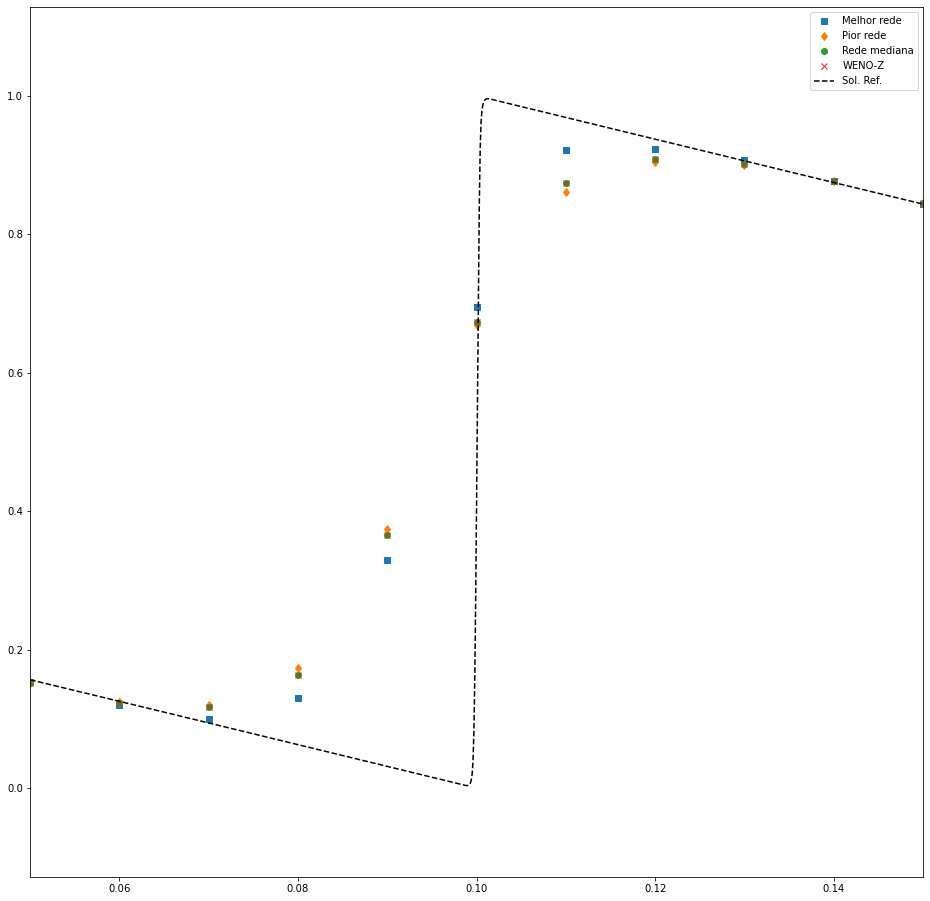

In [14]:
plt.figure(figsize=(16,16))
plt.plot(x,net_y[0],'s',label='Melhor rede')
plt.plot(x,net2_y[0],'d',label='Pior rede')
plt.plot(x,net3_y[0],'o',label='Rede mediana')
plt.plot(x,Z_y[0],'x',label='WENO-Z')
plt.plot(x_dense,ref_y[0],'--',label='Sol. Ref.',color='black')
plt.xlim(0.05,0.15)
plt.legend()
plt.savefig('compara redes.png')

In [ ]:
print(np.sum(np.abs(net_y-ref_y[0,np.arange(0,20000,100)])))
print(np.sum(np.abs(net2_y-ref_y[0,np.arange(0,20000,100)])))
print(np.sum(np.abs(Z_y-ref_y[0,np.arange(0,20000,100)])))

0.7413617937997623
0.842518521805317
0.8511597338765158


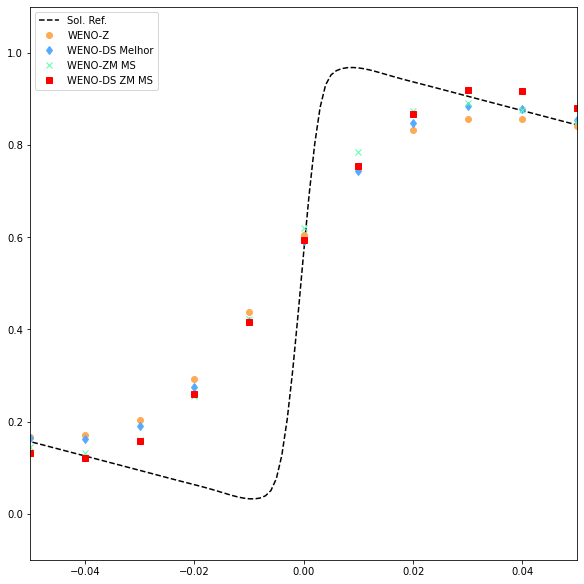

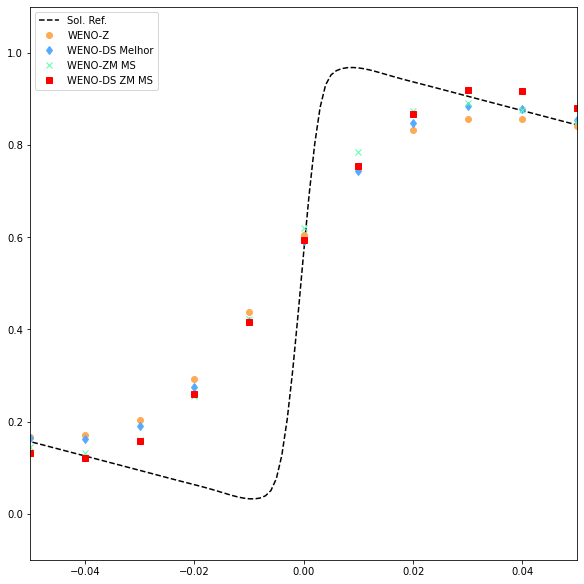

In [27]:
evolve_plot=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS_1.Sim,Sim_ZM_MS.Sim,Sim_DS_ZM_MS.Sim],
                           Δx=Δx,
                           malha=[10,1,1,1,1],
                           names=['Sol. Ref.','WENO-Z','WENO-DS Melhor','WENO-ZM MS','WENO-DS ZM MS'],
                           use_cache=[True,True,False,True,False],
                           replace=False,
                           f_test=f_test_1,
                           f_transform=lambda x:x,
                           fronteira=FronteiraPeriodica,
                           x_range=(-1,1),
                           xlim=(-0.05,0.05),
                           ylim=(-0.1,1.1),
                           colors=['black','#ffaa55','#55aaff','#55ffaa','red'],
                           shapes=['--','o','d','x','s'],
                           figsize=(8,8))
Δt=0.01
evolve_plot.gif_framework(int(2/Δt),Δt,'imagens/transp DS ZM MS zoomed')

In [3]:
equation=euler_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal sequencial 1',equation=equation,WENO_method=WENO_Z)
Sim_Z_MS=simulation(API_Numpy,equation,WENO_Z,mapping=pre_mapping,map_function=Hong_mapping)
Sim_ZM_MS=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=Hong_mapping)
Sim_ZM_BI=simulation(API_Numpy,equation,WENO_Z_pm,mapping=pre_inv_mapping,map_function=BI_mapping)
n_pts=400
Δx=1/(n_pts-1)
x=np.arange(0,1,Δx)
γ=1.4
CFL=0.9
FinalTime=0.038

In [3]:
def f_blast(x):
    k=5
    ρ=x-x+1
    u=x-x
    p=np.where(x< 0.1,1000,0.01)
    p=np.where(0.9<=x,100,p)
    E=p/(γ-1)+ρ*(u**2)/2

    Q=np.stack([ρ,ρ*u,E],axis=0)
    return Q

In [4]:
def f_transform(Q):
    Q0,Q1,Q2=API_Numpy.unstack(Q,axis=-2)
    a=γ-1.0
    b=Q1**2
    c=2*Q0
    d=b/c
    e=Q2-d
    return a*e

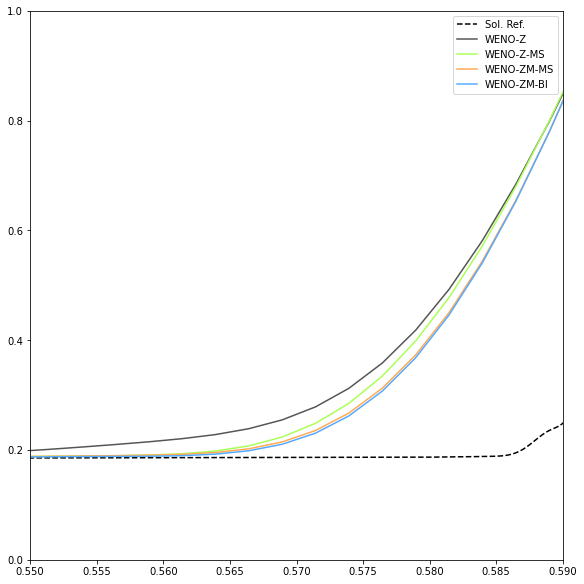

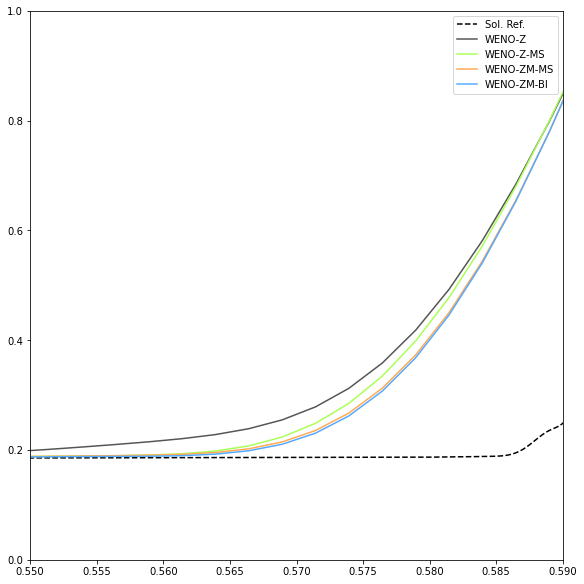

In [11]:
evolve_plot=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_Z_MS.Sim,Sim_ZM_MS.Sim,Sim_ZM_BI.Sim],
                           Δx=Δx,
                           malha=[10,1,1,1,1],
                           names=['Sol. Ref.','WENO-Z','WENO-Z-MS','WENO-ZM-MS','WENO-ZM-BI'],
                           use_cache=[True,True,True,True,True],
                           replace=False,
                           f_test=f_blast,
                           f_transform=lambda x:x[0],
                           fronteira=FronteiraReflexiva,
                           x_range=(0,1),
                           xlim=(0.55,0.59),
                           ylim=(0,1),
                           colors=['black','#555555','#aaff55','#ffaa55','#55aaff'],
                           shapes=['--','-','-','-','-'],
                           figsize=(8,8))
Δt=0.0005
evolve_plot.gif_framework(int(0.038/Δt),Δt,'imagens/blast-MS zoomed')

In [3]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal conv3 - 1',equation=equation,WENO_method=WENO_Z)
Sim_DS=Sim_Z

In [79]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
Sim_DS_1=load_model('Modelos treinados/23cifbcu/misty-sweep-18',equation=equation,WENO_method=WENO_Z)
Sim_DS_2=load_model('Modelos treinados/23cifbcu/treasured-sweep-29',equation=equation,WENO_method=WENO_Z)
Δx=0.01
CFL=0.5

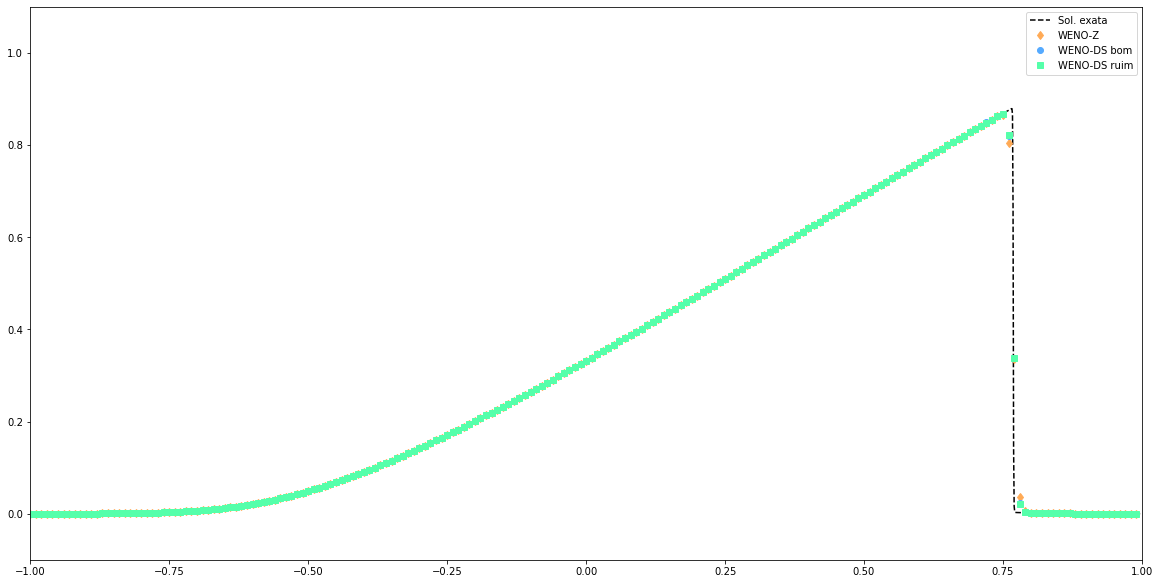

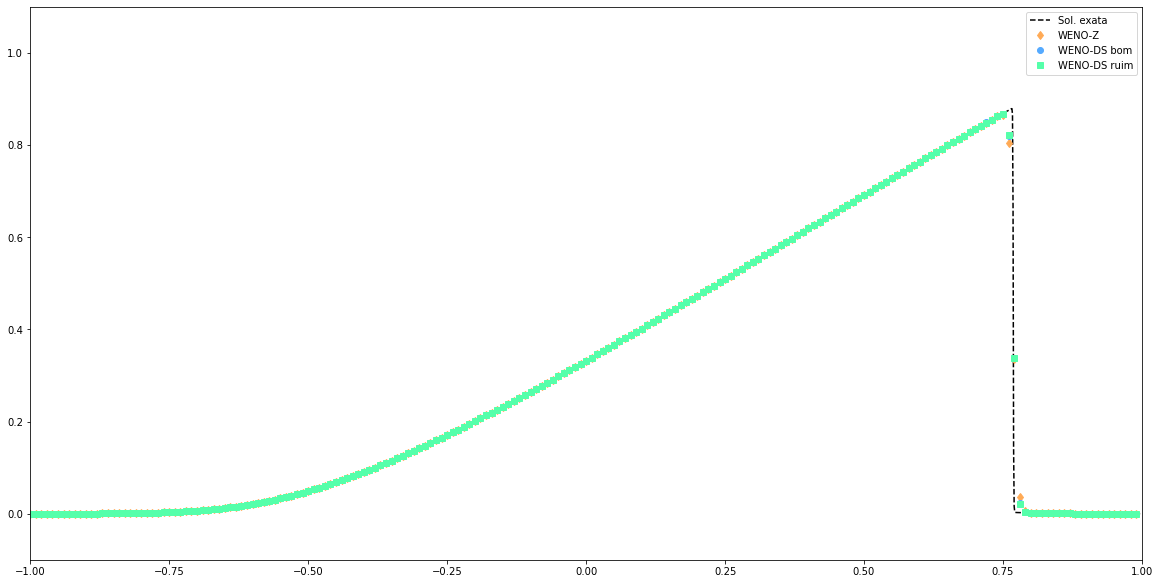

In [80]:
evolve_plot1=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS_1.Sim,Sim_DS_2.Sim],
                           Δx=0.01,
                           malha=[10,1,1,1],
                           names=['Sol. ref.','WENO-Z','WENO-DS bom','WENO-DS ruim'],
                           use_cache=[True,True,False,False],
                           replace=False,
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff', '#55ffaa'],
                           shapes=['--','d','o','s'])

evolve_plot1.gif_framework(int(1/0.01),0.01,'imagens/burgers-ds 2')

In [87]:
ref_u,Z_u,net1_u,net2_u=evolve_plot1.U

In [90]:
print(np.sum(np.abs(net1_u-ref_u[0,np.arange(0,2000,10)])))
print(np.sum(np.abs(net2_u-ref_u[0,np.arange(0,2000,10)])))
print(np.sum(np.abs(Z_u-ref_u[0,np.arange(0,2000,10)])))

0.40469459074682934
0.399917583927687
0.43308678424606806


In [ ]:
evolve_plot2=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(0.4,0.6),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot2.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

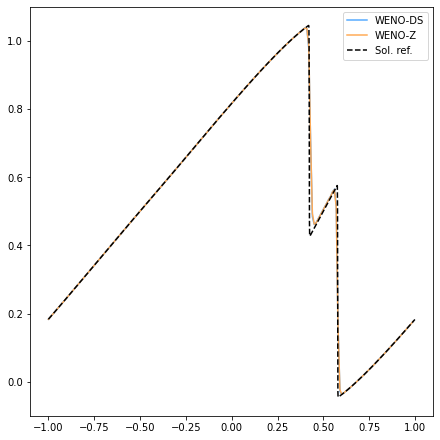

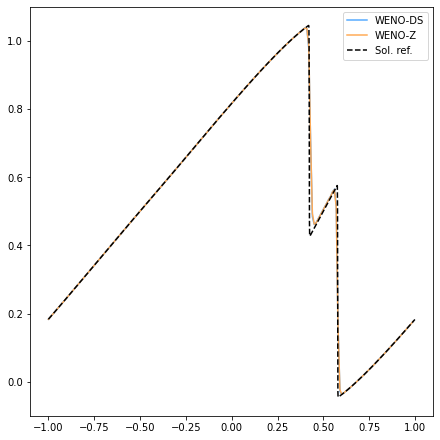

In [ ]:
evolve_plot3=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_1,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot3.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 1')

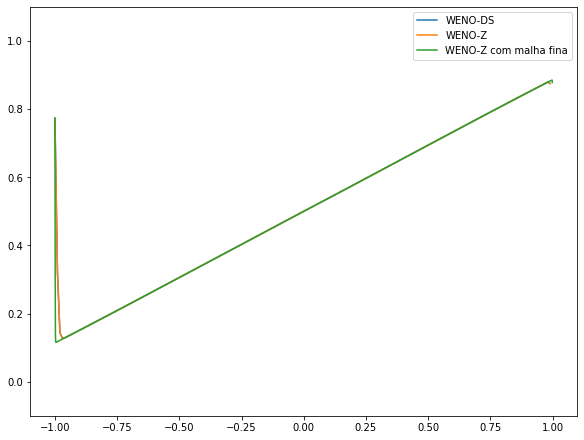

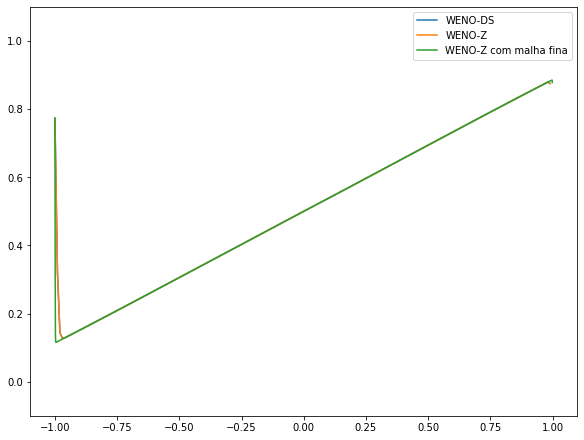

In [ ]:
evolve_plot4=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot4.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2 satur')